# Data loading and cleaning

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso

# Load data
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url)

# Select target and features
TARGET = 'diabetes_prevalence'
FEATURES = [
    'Median_Household_Income_2018',
    'PCTPOVALL_2018',  # Poverty rate
    "Percent of adults with a bachelor's degree or higher 2014-18",
    'Percent of Population Aged 60+',
    'Unemployment_rate_2018',
    '% Black-alone'
]

# Clean data
df = data[FEATURES + [TARGET]].copy()
df = df.dropna(subset=[TARGET])  # Remove rows with missing target
df = df.fillna(df.median())  # Fill other missing values with median

print("Data shape after cleaning:", df.shape)
print("Missing values:\n", df.isnull().sum())

Data shape after cleaning: (3140, 7)
Missing values:
 Median_Household_Income_2018                                    0
PCTPOVALL_2018                                                  0
Percent of adults with a bachelor's degree or higher 2014-18    0
Percent of Population Aged 60+                                  0
Unemployment_rate_2018                                          0
% Black-alone                                                   0
diabetes_prevalence                                             0
dtype: int64


# EDA

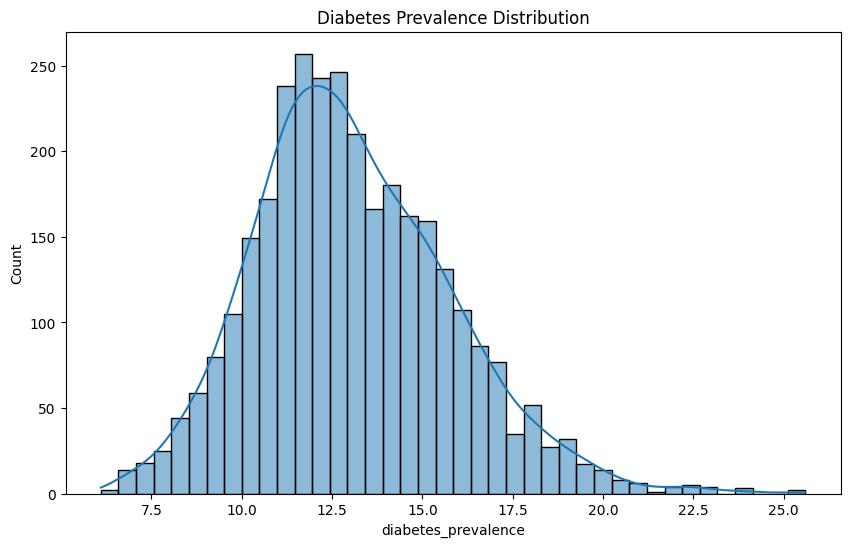

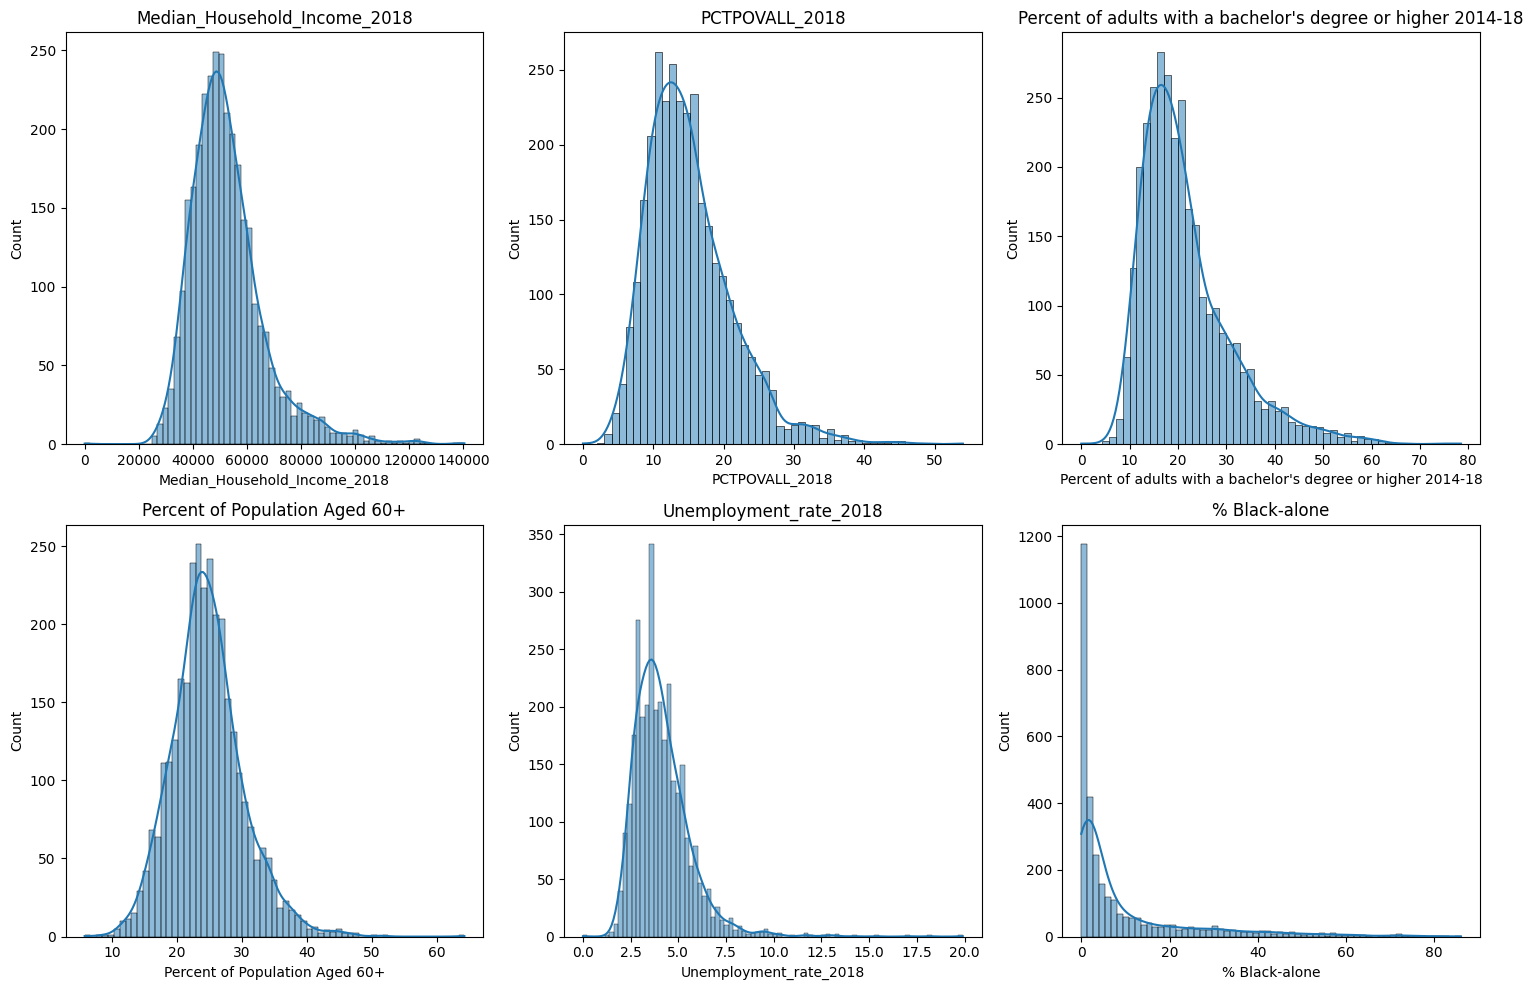

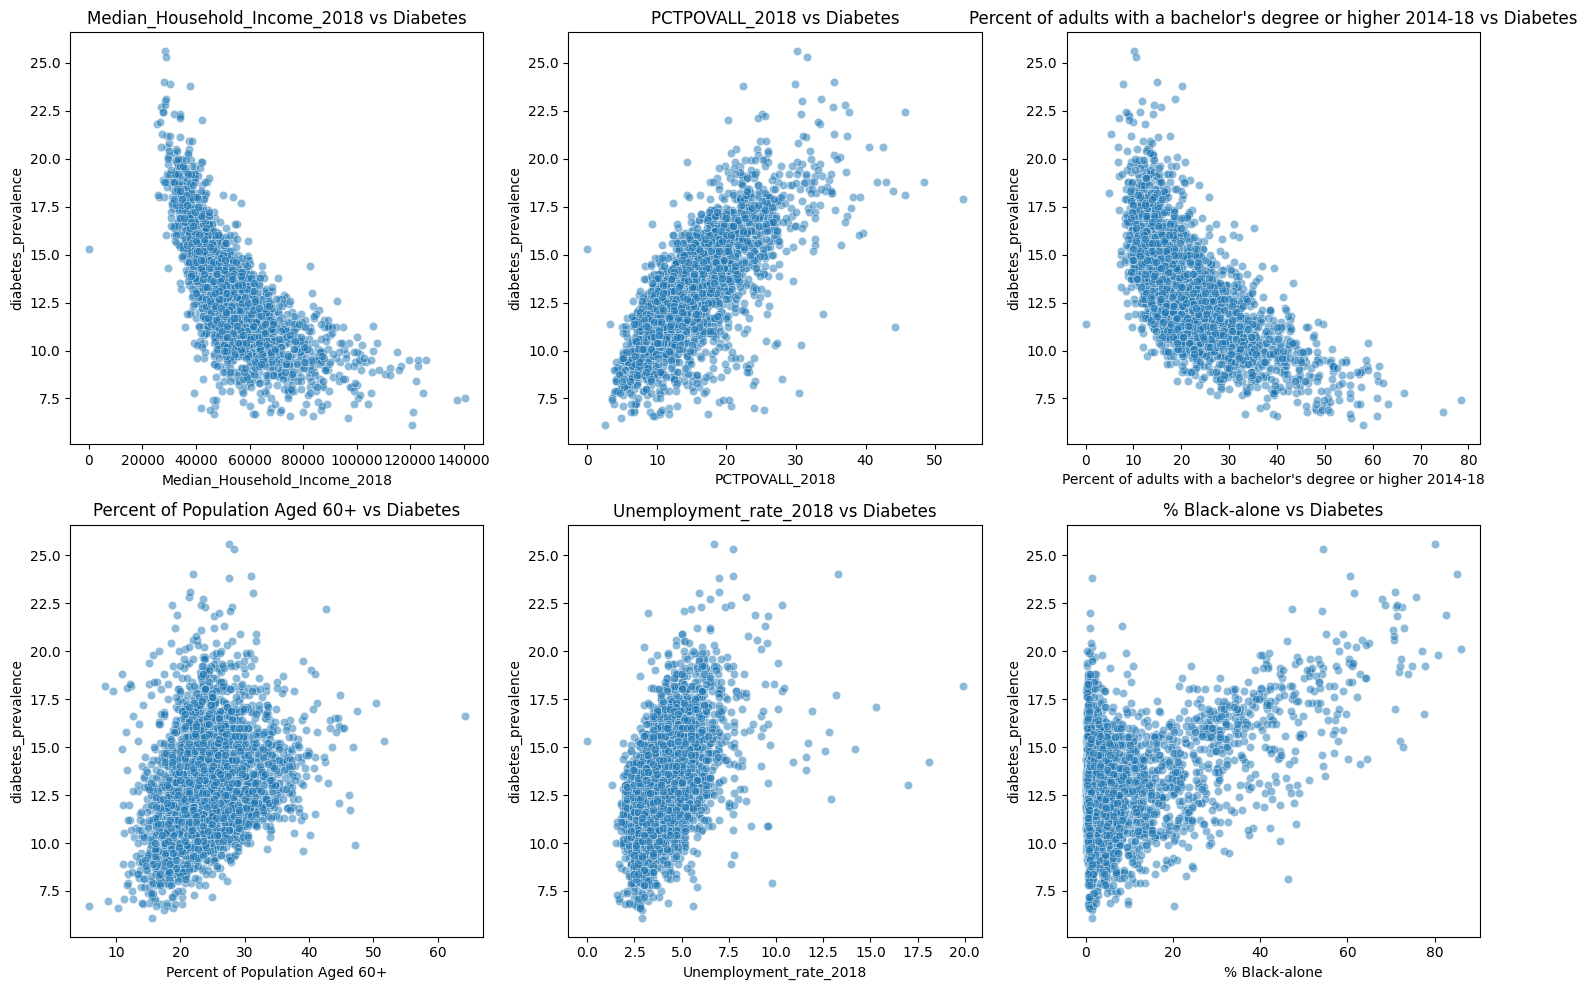

In [4]:
# 1. Target distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[TARGET], kde=True)
plt.title('Diabetes Prevalence Distribution')
plt.show()

# 2. Feature distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, feature in enumerate(FEATURES):
    sns.histplot(df[feature], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(feature)
plt.tight_layout()
plt.show()

# 3. Feature vs target relationships
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, feature in enumerate(FEATURES):
    sns.scatterplot(x=df[feature], y=df[TARGET], alpha=0.5, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"{feature} vs Diabetes")
plt.tight_layout()
plt.show()

# Preprocessing


In [5]:
# Split data
X = df[FEATURES]
y = df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set size:", X_train_scaled.shape)
print("Test set size:", X_test_scaled.shape)

Training set size: (2512, 6)
Test set size: (628, 6)


# Baseline

In [6]:
# Train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Evaluate
y_pred = lr.predict(X_test_scaled)
lr_r2 = r2_score(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Baseline Linear Regression:")
print(f"R²: {lr_r2:.4f}")
print(f"RMSE: {lr_rmse:.4f}")

TypeError: got an unexpected keyword argument 'squared'

# Regularized Model

In [ ]:
# Test different alpha values
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 20]
results = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    
    y_pred = lasso.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    n_zero_coef = sum(lasso.coef_ == 0)
    
    results.append({
        'alpha': alpha,
        'r2': r2,
        'rmse': rmse,
        'n_zero_coef': n_zero_coef
    })

# Results table
results_df = pd.DataFrame(results)
print("\nLasso Regression Results:")
print(results_df)

# Find best model
best_idx = results_df['r2'].idxmax()
best_alpha = results_df.loc[best_idx, 'alpha']
best_r2 = results_df.loc[best_idx, 'r2']